In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [3]:
dfTrain=pd.read_csv("C:/Users/91983/Desktop/train.csv")
dfTest=pd.read_csv("C:/Users/91983/Desktop/test.csv")

In [5]:
df=pd.concat([dfTrain,dfTest])
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [8]:
print("Number of Data Points:",df.shape[0])
print("Number of Fatures     :",df.shape[1])

Number of Data Points: 10299
Number of Fatures     : 563


In [9]:
print(df.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)


In [10]:
y=df['Activity'].copy()
x=df.drop('Activity',inplace=False,axis=1)

In [11]:
columnNames=list()
columnNames=df.columns
columnNames

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [12]:
list(columnNames)

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [13]:
badChars=['-','()','(',')',',']

In [18]:
newColumnNames=[]
for colName in columnNames:
    newColumnName=''.join(i for i in colName if i not in badChars)
    newColumnNames.append(newColumnName)

In [19]:
newColumnNames

['tBodyAccmeanX',
 'tBodyAccmeanY',
 'tBodyAccmeanZ',
 'tBodyAccstdX',
 'tBodyAccstdY',
 'tBodyAccstdZ',
 'tBodyAccmadX',
 'tBodyAccmadY',
 'tBodyAccmadZ',
 'tBodyAccmaxX',
 'tBodyAccmaxY',
 'tBodyAccmaxZ',
 'tBodyAccminX',
 'tBodyAccminY',
 'tBodyAccminZ',
 'tBodyAccsma',
 'tBodyAccenergyX',
 'tBodyAccenergyY',
 'tBodyAccenergyZ',
 'tBodyAcciqrX',
 'tBodyAcciqrY',
 'tBodyAcciqrZ',
 'tBodyAccentropyX',
 'tBodyAccentropyY',
 'tBodyAccentropyZ',
 'tBodyAccarCoeffX1',
 'tBodyAccarCoeffX2',
 'tBodyAccarCoeffX3',
 'tBodyAccarCoeffX4',
 'tBodyAccarCoeffY1',
 'tBodyAccarCoeffY2',
 'tBodyAccarCoeffY3',
 'tBodyAccarCoeffY4',
 'tBodyAccarCoeffZ1',
 'tBodyAccarCoeffZ2',
 'tBodyAccarCoeffZ3',
 'tBodyAccarCoeffZ4',
 'tBodyAcccorrelationXY',
 'tBodyAcccorrelationXZ',
 'tBodyAcccorrelationYZ',
 'tGravityAccmeanX',
 'tGravityAccmeanY',
 'tGravityAccmeanZ',
 'tGravityAccstdX',
 'tGravityAccstdY',
 'tGravityAccstdZ',
 'tGravityAccmadX',
 'tGravityAccmadY',
 'tGravityAccmadZ',
 'tGravityAccmaxX',
 'tGrav

In [20]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [21]:
df.columns=newColumnNames

In [22]:
df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [24]:
df.isnull().sum()

tBodyAccmeanX        0
tBodyAccmeanY        0
tBodyAccmeanZ        0
tBodyAccstdX         0
tBodyAccstdY         0
                    ..
angleXgravityMean    0
angleYgravityMean    0
angleZgravityMean    0
subject              0
Activity             0
Length: 563, dtype: int64

In [26]:
df.isnull().any().sum()

0

<AxesSubplot:>

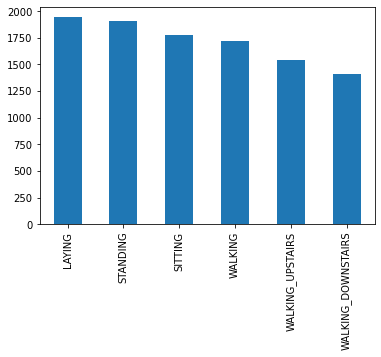

In [27]:
df.Activity.value_counts().plot.bar()

In [28]:
%time
df.groupby('Activity').mean()

CPU times: total: 0 ns
Wall time: 0 ns


,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,0.268649,-0.018318,-0.107436,-0.960932,-0.943507,-0.948069,-0.963395,-0.944099,-0.947261,-0.911610,...,-0.342490,-0.658640,0.010366,0.016013,0.022788,0.009191,0.520261,-0.435944,-0.427749,16.643519
SITTING,0.273060,-0.012690,-0.105517,-0.983446,-0.934881,-0.938982,-0.985280,-0.934798,-0.936671,-0.926703,...,-0.384740,-0.686795,0.012034,0.002458,0.013413,-0.033260,-0.706042,0.006140,-0.089532,16.680360
STANDING,0.279153,-0.016152,-0.106587,-0.984435,-0.932509,-0.939914,-0.987205,-0.933875,-0.937739,-0.921265,...,-0.343769,-0.654989,0.006991,0.010397,0.004614,0.015957,-0.774143,0.209818,0.031743,16.513116
WALKING,0.276337,-0.017907,-0.108882,-0.314644,-0.023583,-0.273921,-0.352470,-0.055491,-0.274098,-0.113458,...,-0.071308,-0.400268,0.014918,-0.007011,0.011332,-0.019443,-0.761886,0.218599,0.059771,15.272938
WALKING_DOWNSTAIRS,0.288137,-0.016312,-0.105762,0.100766,0.059549,-0.190805,0.032426,0.003907,-0.214569,0.417152,...,-0.277020,-0.618394,-0.039692,-0.018665,0.203588,-0.076029,-0.780873,0.200189,0.055866,15.828592
WALKING_UPSTAIRS,0.262295,-0.025923,-0.120538,-0.237990,-0.016033,-0.175450,-0.297094,-0.030865,-0.172811,-0.015003,...,-0.361533,-0.682468,0.035371,0.006652,-0.129903,0.036432,-0.637980,0.278642,0.122794,15.716969


In [29]:
%time
df.groupby('Activity').mean()['tBodyAccmeanX']

CPU times: total: 0 ns
Wall time: 0 ns


Activity
LAYING                0.268649
SITTING               0.273060
STANDING              0.279153
WALKING               0.276337
WALKING_DOWNSTAIRS    0.288137
WALKING_UPSTAIRS      0.262295
Name: tBodyAccmeanX, dtype: float64

In [31]:
%time
df.groupby('Activity').mean()['tBodyAccstdX']

CPU times: total: 0 ns
Wall time: 0 ns


Activity
LAYING               -0.960932
SITTING              -0.983446
STANDING             -0.984435
WALKING              -0.314644
WALKING_DOWNSTAIRS    0.100766
WALKING_UPSTAIRS     -0.237990
Name: tBodyAccstdX, dtype: float64

In [32]:
print("Number of duplicates:",df.duplicated().sum())

Number of duplicates: 0


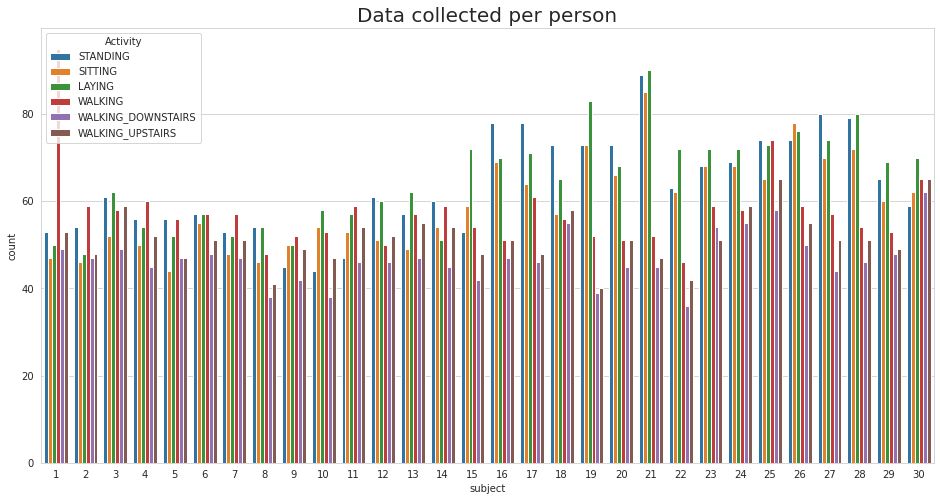

In [33]:
sns.set_style('whitegrid')
plt.rcParams['font.family']='Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data collected per person',fontsize=20)
sns.countplot(x='subject',hue='Activity',data=df)
plt.show()

C:\Users\91983\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureW

Text(0.0, 5, 'Moving Activities')

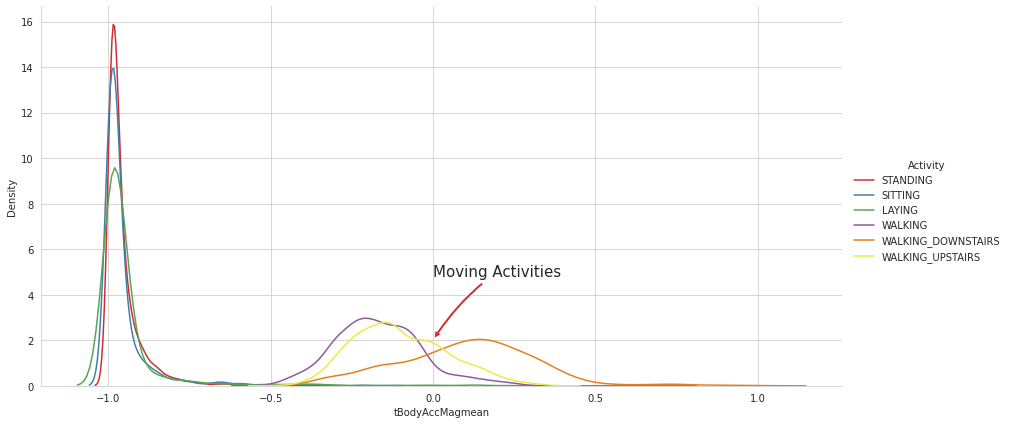

In [39]:
sns.set_palette("Set1",desat=0.8)
facetgrid=sns.FacetGrid(df,hue='Activity',size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean',hist=False).add_legend()
plt.annotate("Stationary Activities",xy=(-0.956,17),xytext=(-0.9,23),size=15,\
            va='center',ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities",xy=(0.0,2),xytext=(0.0,5),size=15,va='center',ha='left',\
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

C:\Users\91983\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureW

Text(0.0, 5, 'Moving Activities')

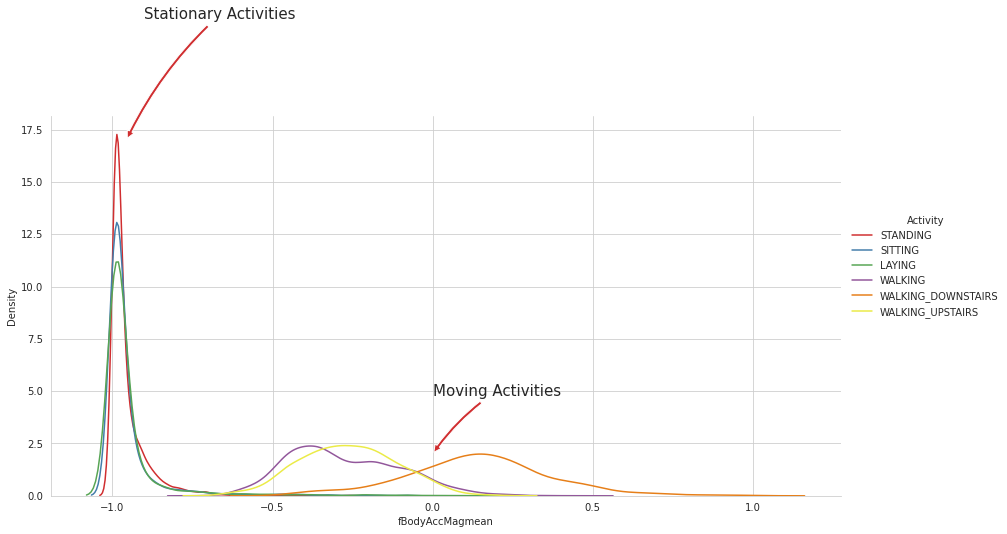

In [40]:
sns.set_palette("Set1",desat=0.8)
facetgrid=sns.FacetGrid(df,hue='Activity',size=6,aspect=2)
facetgrid.map(sns.distplot,'fBodyAccMagmean',hist=False).add_legend()
plt.annotate("Stationary Activities",xy=(-0.956,17),xytext=(-0.9,23),size=15,\
            va='center',ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities",xy=(0.0,2),xytext=(0.0,5),size=15,va='center',ha='left',\
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

C:\Users\91983\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureW

Text(0.0, 5, 'Moving Activities')

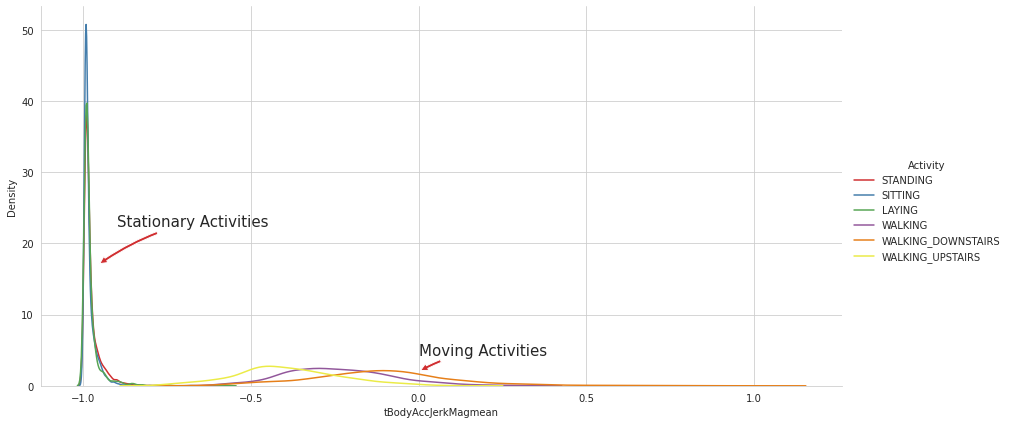

In [42]:
sns.set_palette("Set1",desat=0.8)
facetgrid=sns.FacetGrid(df,hue='Activity',size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccJerkMagmean',hist=False).add_legend()
plt.annotate("Stationary Activities",xy=(-0.956,17),xytext=(-0.9,23),size=15,\
             va='center',ha='left',\
             arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities",xy=(0.0,2),xytext=(0.0,5),size=15,va='center',ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

In [43]:
df['tBodyAccJerkMagmean'].max()

1.0

# Observations

 sns.set_palette("Set1",desat=0.8)
facetgrid=sns.FacetGrid(df,hue='Activity',size=6,aspect=2)
facetgrid.map(sns.distplot,'tGravityAccMagmean',hist=False).add_legend()
plt.annotate("Stationary Activities",xy=(-0.956,17),xytext=(-0.9,23),size=15,\
            va='center',ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities",xy=(0.0,2),xytext=(0.0,5),size=15,va='center',ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:title={'center':'tBodyAccJerkMagmean for Stationary Activities'}, xlabel='tBodyAccJerkMagmean', ylabel='Density'>

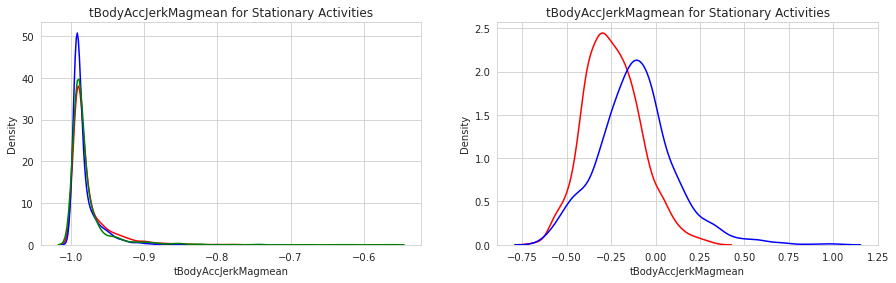

In [47]:
df1=df[df['Activity']=='STANDING']
df2=df[df['Activity']=='SITTING']
df3=df[df['Activity']=='LAYING']
df4=df[df['Activity']=='WALKING']
df5=df[df['Activity']=='WALKING_DOWNSTAIRS']
df6=df[df['Activity']=='WALKING_UPSTAIRES']

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title('tBodyAccJerkMagmean for Stationary Activities')
sns.distplot(df1['tBodyAccJerkMagmean'],color='r',hist=False,label="Standing")
sns.distplot(df2['tBodyAccJerkMagmean'],color='b',hist=False,label="Sitting")
sns.distplot(df3['tBodyAccJerkMagmean'],color='g',hist=False,label="Laying")


plt.subplot(2,2,2)
plt.title('tBodyAccJerkMagmean for Stationary Activities')
sns.distplot(df4['tBodyAccJerkMagmean'],color='r',hist=False,label="Walking")
sns.distplot(df5['tBodyAccJerkMagmean'],color='b',hist=False,label="Walking_downstaires")
sns.distplot(df6['tBodyAccJerkMagmean'],color='g',hist=False,label="Walking_upstaires")


C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

<AxesSubplot:title={'center':'tBodyAccMagmean for Moving Activities'}, xlabel='tBodyAccMagmean', ylabel='Density'>

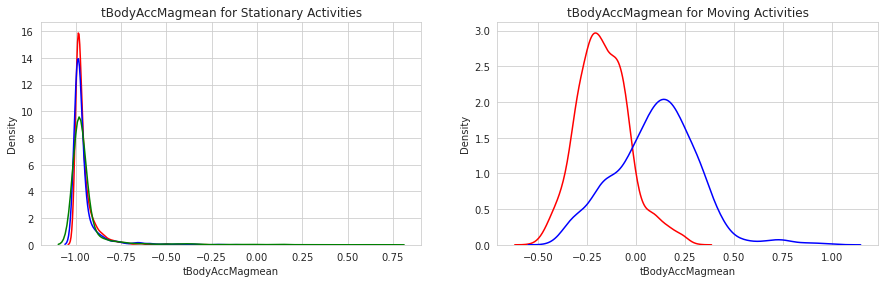

In [49]:
plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.title('tBodyAccMagmean for Stationary Activities')
sns.distplot(df1['tBodyAccMagmean'],color='r',hist=False,label="Standing")
sns.distplot(df2['tBodyAccMagmean'],color='b',hist=False,label="Sitting")
sns.distplot(df3['tBodyAccMagmean'],color='g',hist=False,label="Laying")


plt.subplot(2,2,2)
plt.title('tBodyAccMagmean for Moving Activities')
sns.distplot(df4['tBodyAccMagmean'],color='r',hist=False,label="Walking")
sns.distplot(df5['tBodyAccMagmean'],color='b',hist=False,label="Walking_downstairs")
sns.distplot(df6['tBodyAccMagmean'],color='g',hist=False,label="Walking_upstairs")

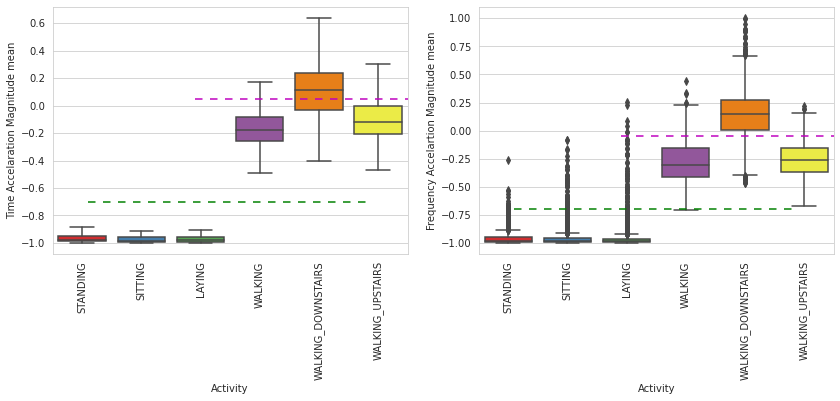

In [51]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x='Activity',y='tBodyAccMagmean',data=df,showfliers=False,saturation=1)
plt.ylabel('Time Accelaration Magnitude mean')
plt.axhline(y=-0.7,xmin=0.1,xmax=0.9,dashes=(5,5),c='g')
plt.axhline(y=0.05,xmin=0.4,dashes=(5,5),c='m')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.boxplot(x='Activity',y='fBodyAccMagmean',data=df,showfliers=True,saturation=1)
plt.ylabel('Frequency Accelartion Magnitude mean')
plt.axhline(y=-0.7,xmin=0.1,xmax=0.9,dashes=(5,5),c='g')
plt.axhline(y=-0.05,xmin=0.4,dashes=(5,5),c='m')
plt.xticks(rotation=90)
plt.show()


# observations in frequency domain
1.if tAccMean is <-0.8 then the Activities are either standinh or sitting or Laying.
2.if tAccMean is >-0.6 then the Activities are either Walking or WalkingDownstairs or Walking Upstairs
3.if tAccMean is >0.0 then the Activity is WalkingDownStai
4.we can classify 75% the Activity labels with some errors

# observation sin Frequency domain
1.if Body AccMagmean is <-0.75 then the Activities are either Standing or Sitting or Laying
2.if Body AccMagmean is >-0.5 the the Activities are either Walking or WalkingDownStairs or WalkingUpstairs
3.if BodyAccMagmean>0.0 the the Activity is WalkingDownStairs
4.we can classify 75% the Activity labels with some errors.
    However here we can see the outliers.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

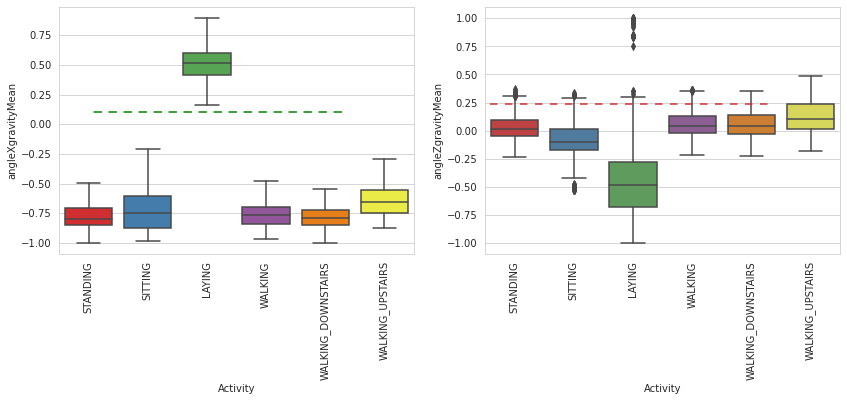

In [52]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x='Activity',y='angleXgravityMean',data=df,showfliers=False,saturation=1)
plt.axhline(y=0.1,xmin=0.1,xmax=0.8,dashes=(5,5),c='g',animated=True,dash_capstyle='round')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.boxplot(x='Activity',y='angleZgravityMean',data=df)
plt.axhline(y=0.24,xmin=-1,xmax=0.8,dashes=(5,5))
plt.xticks(rotation=90)




(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

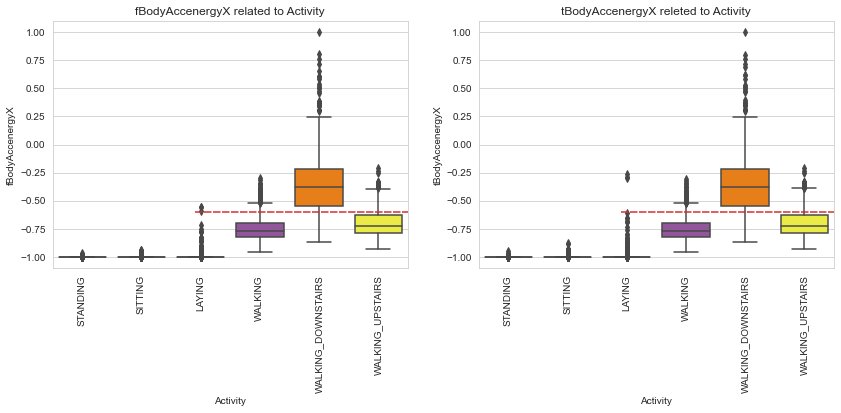

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x='Activity',y='fBodyAccenergyX',data=df,saturation=1)
plt.axhline(y=-0.6,xmin=0.4,xmax=1.0,dashes=(5,1))
plt.title('fBodyAccenergyX related to Activity')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
sns.boxplot(x='Activity',y='tBodyAccenergyX',data=df,saturation=1)
plt.axhline(y=-0.6,xmin=0.4,xmax=1.0,dashes=(5,1))
plt.title('tBodyAccenergyX releted to Activity')
plt.xticks(rotation=90)


# Observation
1.All the features some how differentaiate w.r.t moving activities and stationary activities
2.Body accelaration along X axis w.r.t Time domain and Frequency domain features help to conclude walking downstaires
activity is differentiable w.r.t moving activities

SOMEHOW ALL THE PICTURES LOOKS IMPORTANT HERE.IF ANY SPECEFIC FEATURE MAY NOT CLAERLY DIFFERNTIATE ALL ACTIVITIES OTHER 
FEATURES MAY DIFFERENTIATE.

TO GET MORE CLARIFICATION PERFOEM DIMENSIONALITY REDUCTION
1.Principle Component Analysis(PCA)
2.t-SNE

# PCA

In [56]:
from sklearn.decomposition import PCA

In [58]:
%time
pca=PCA(n_components=2)
components=pca.fit_transform(x)
components.shape

CPU times: total: 0 ns
Wall time: 0 ns


(10299, 2)

In [59]:
componentsDataFrame=pd.DataFrame(components,columns=['component1','component2'])

Text(0.5, 1.0, '2D visualization of data using PCA')

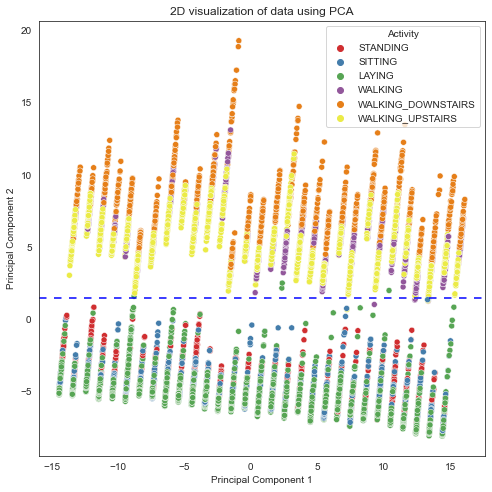

In [61]:
sns.set_style('white')
plt.figure(figsize=(8,8))
sns.scatterplot(x='component1',y='component2',hue=y,data=componentsDataFrame)
plt.axhline(y=1.5,xmin=0,xmax=1,dashes=(5,5),c='b')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D visualization of data using PCA')

# Observation
1.2d visualization of data using PCA shows that there id significant difference between moving and stationary activities.
2.PCA based visulization cannot differntiate Ststionary activities
3.PCA based visiulizatiin cannot differentiate moving activities

# t-SNE

In [63]:
from sklearn.manifold import TSNE

In [64]:
%%time
tsne=TSNE(n_components=2)
tsneComponents=tsne.fit_transform(x)

C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


CPU times: total: 3min 40s
Wall time: 1min 21s


In [66]:
tsneComponents.shape

(10299, 2)

In [75]:
tsneDataFrame=pd.DataFrame(tsneComponents,columns=['tsneComponent1','tsneComponent2'])

C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.048s...
[t-SNE] Computed neighbors for 10299 samples in 4.639s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 0.680265
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.931396
[t-SNE] KL d

C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 10299 samples in 0.041s...
[t-SNE] Computed neighbors for 10299 samples in 25.619s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.115070
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.079796
[t-SNE] KL divergence after 1000 iterations: 1.42601

C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.081s...
[t-SNE] Computed neighbors for 10299 samples in 19.823s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.336517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.879547
[t-SNE] KL

C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10299 samples in 16.783s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.542361
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.944092
[t-SNE] KL divergence after 1000 iterations: 1.012761
[t-SNE] Computing 91 nearest neighbors...

C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 10299 samples in 0.106s...
[t-SNE] Computed neighbors for 10299 samples in 20.304s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.661688
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.172142
[t-SNE] KL divergence after 1000 iterations: 0.92445

C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 10299 samples in 0.051s...
[t-SNE] Computed neighbors for 10299 samples in 5.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.746680
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.137375
[t-SNE] KL divergence after 1000 iterations: 0.864843

C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.063s...
[t-SNE] Computed neighbors for 10299 samples in 19.296s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.812791
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.918373
[t-SNE] K

C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10299 samples in 5.347s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.867056
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.913673
[t-SNE] KL divergence after 1000 iterations: 0.785706
[t-SNE] Computing 241 nearest neighbors...

C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10299 samples in 5.138s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.954281
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.337128
[t-SNE] KL divergence after 1000 iterations: 0.731527
[t-SNE] Computing 301 nearest neighbors...

C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10299 samples in 5.604s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 2.024747
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.010559
[t-SNE] KL divergence after 1000 iterations: 0.693579
CPU times: total: 46min 37s
Wall time: 15m

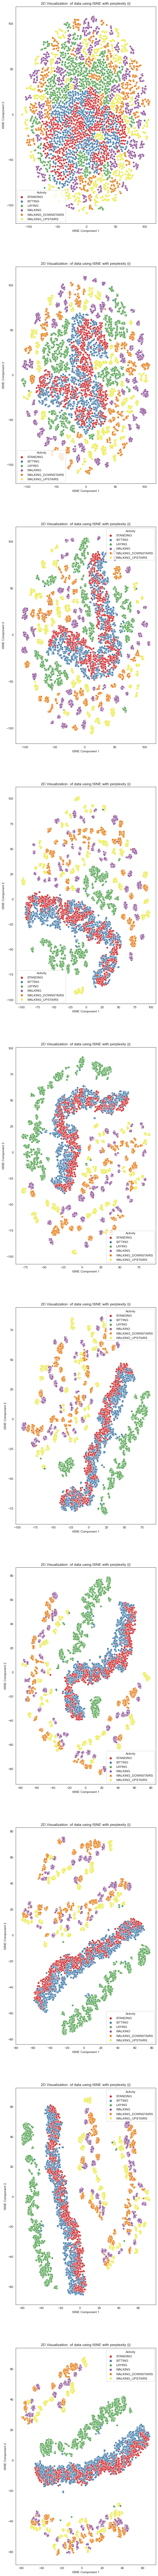

In [78]:
%%time
perplexities=[2,5,10,20,30,40,50,60,80,100]
sns.set_style('white')
plt.figure(figsize=(8,150))
for i ,p in enumerate(perplexities):
    tsne=TSNE(n_components=2,perplexity=p,verbose=1)
    tsneComponents=tsne.fit_transform(x)
    tsneDataFrame=pd.DataFrame(tsneComponents,columns=['tsneComponent1','tsneComponent2'])
    plt.subplot(10,1,i+1)
    sns.scatterplot(x='tsneComponent1',y='tsneComponent2',hue=y,data=tsneDataFrame)
    plt.xlabel('tSNE Component 1')
    plt.ylabel('tSNE Component 2')
    plt.title('2D Visualization  of data using tSNE with perplexity {i}')

# Observations:
1.PCA cannot differentiate static activities standing,sitiing and laying but using tSNE we can see the difference
2.PCA cannot differentiate moving activities standing ,sitting and lying bust using tSNE we can see the difference
3.However tSNE shows the sight confusion between two activities sitting and standing.
4.finally good new is all classes are seprerable)


# Machine Learning Model TRanning
   PERFORMANCE MEEASURE
*AS this is a classification problem and dataset is almost balanced Accuracy as performance mertic can be used.
*for the sake of detailed classifications report we will use confusion matrix and precision matrix

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [112]:
df=pd.read_csv("C:/Users/91983/Desktop/train.csv")

In [113]:
x=df.drop('Activity',inplace=False,axis=1)
y=df['Activity']

In [114]:
y=y.map({'STANDING':0,'SITTING':1,'LAYING':2,'WALKING':3,'WALKING_DOWNSTAIRS':4,'WALKING_UPSTAIRS':5})

In [115]:
y.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [88]:
print("shape of y:",y.shape)
print("shape of x:",x.shape)

shape of y: (10299,)
shape of x: (10299, 562)


# Split data into Train,Test,Cross Validation

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x1,x_test,y1,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
x_train,x_cv,y_train,y_cv=train_test_split(x1,y1,test_size=0.2,random_state=10)

In [92]:
print("Number of data points in Train",x_train.shape)
print("Number of data points in Test",x_test.shape)
print("Number of data points in CV",x_cv.shape)

Number of data points in Train (6591, 562)
Number of data points in Test (2060, 562)
Number of data points in CV (1648, 562)


In [93]:
print("Number of data points in Train",y_train.shape)
print("Number of data points in Test",y_test.shape)
print("Number of data points in CV",y_cv.shape)

Number of data points in Train (6591,)
Number of data points in Test (2060,)
Number of data points in CV (1648,)


# Base model-Random model
To compare the performance we will use a random Model as a benchmark
y_pred as random values between 0-5

In [94]:
import numpy as np

In [95]:
np.random.seed(10)
y_pred =np.random.randint(low=0,high=6,size=(x_test.shape[0]))
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5])

In [96]:
y_pred

array([1, 5, 4, ..., 3, 5, 2])

In [123]:
def printPerformace(actual,predection,string):
    cf=confusion_matrix(actual,predection)
    plt.figure(figsize=(14,9))
    sns.heatmap(cf,fmt=".2g",annot=True,xticklabels=True,yticklabels=True)
    plt.xlabels('Perdicted')
    plt.ylabels('Actual')
    plt.title("Confusion Matrix for"+string)
    
    plt.subplot(2,2,2)
    colSum=np.Sum(cf,axis=0)
    colSum=colSum.reshape(-1,1)
    PrecisionMatrix=cf/colSum
    sns.heatmap(PrecisionMatrix,fmt=".2g",annot=True,xticklabels=True,yticklabels=True)
    plt.xlabels('Predicted')
    plt.ylabel('Actual')
    plt.title("Precision Matrix for"+string)
    
    plt.subplot(2,2,3)
    rowSum=np.sum(cf,axis=1)
    rowSum=rowSum.reshape(1,-1)
    RecallMatrix=cf/rowSum
    sns.heatmap(RecallMatrix,fmt=".3g",annot=True,xticklabels=True,yticklabels=True)
    plt.xlabels('Predicted')
    plt.ylabels('Actual')
    plt.title("Recall Matrix for"+string)


In [129]:
df=pd.read_csv("C:/Users/91983/Desktop/train.csv")

In [132]:
df.fillna(value=0,inplace=True)
x=df.drop('Activity',inplace=False,axis=1)
y=df['Activity']

In [133]:
printPerformace(y_test,y_pred,"Random Model")

ValueError: Input y_true contains NaN.